In [1]:
# Note: This notebook was created by Guntaas Kapoor (guntaaskapoor.bt23cseds@pec.edu.in)

# **Autoencoders for Unsupervised Machine Learning**

1. Autoencoders are a type of Neural Network that are used to learn efficient lower dimension representations of the data

2. Autoencoders can be used for dimensionality reduction or anomaly detection

3. They are used in higher dimensional data like image data, text embeddings etc
- Encoder - Compresses the input into a lower dimensional data
- Decoder - Reconstructs the input from the lower dimensional data
- During training - minimize reconstruction loss (Mean Squared Error)

# Different types of Autoencoders:

- **Vanilla Autoencoder:** Uses fully connected layers to compress and reconstruct data.
  
- **Convolutional Autoencoder (CAE)**: Uses convolutional layers, effective for image data.

- **Variational Autoencoder (VAE)**: Learns a probabilistic distribution of the latent space, useful for generative modeling.

- **Denoising Autoencoder (DAE)**: Trained to reconstruct data from noisy inputs, enhancing robustness.


# 1. **Dimensionality Reduction for Images**

Unlike traditional autoencoders, CAEs retain spatial information, making them better for high-dimensional images.
Can be used as a feature extractor for clustering or classification tasks.

## Convolutional Autoencoder (CAE) - Used for image data

## **1.1 Importing the libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

## **1.2 Importing the digits dataset (handwritten digits from 0-9)**

In [3]:
from sklearn.datasets import load_digits

In [4]:
data = load_digits() #Loading the data
X = data.data

In [5]:
X.shape #(1797 rows of images with 64 columns)

(1797, 64)

In [6]:
X[0].size # Size of each image (8x8=64)

64

## **1.3 Scaling each image to from 0-255 to 0-1 values**

### Grayscale Image Representation and Normalization

The images consist of **64 pixels** in total. Each pixel is represented by a number in the range **0-255**, indicating its grayscale intensity:

- **0** represents **black**  
- **255** represents **white**  
- Values in between represent varying shades of gray  

For instance:  
- A pixel with a value of **0.8** will be **mostly white**  
- A pixel with a value of **0.2** will be **mostly black**  

### Normalization with Min-Max Scaling  

To facilitate easier processing, the pixel values are **scaled to a range of 0 to 1**. This is done using **Min-Max Scaling**, which is particularly useful when the **minimum and maximum values are known**.

The formula for Min-Max Scaling is:  

$$
\text{new\_value} = \frac{\text{old\_value} - \text{min}}{\text{max} - \text{min}}
$$

For grayscale images:  
- **min = 0** (black)  
- **max = 255** (white)  

Thus, the transformation becomes:

$$
\text{new\_value} = \frac{\text{old\_value} - 0}{255 - 0} = \frac{\text{old\_value}}{255}
$$

After normalization:  
- **0** remains **0** (black)  
- **255** becomes **1** (white)  
- Intermediate values are proportionally scaled between **0 and 1**  
onally scaled between **0 and 1**  


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
X_scaled = scaler1.fit_transform(X)

In [8]:
X_scaled[0]  # This represents the scaled down values.Note that each pixel now has values in the range of 0-1

array([0.        , 0.        , 0.3125    , 0.8125    , 0.5625    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 0.9375    , 0.625     , 0.9375    , 0.3125    ,
       0.        , 0.        , 0.1875    , 0.9375    , 0.125     ,
       0.        , 0.6875    , 0.5       , 0.        , 0.        ,
       0.26666667, 0.75      , 0.        , 0.        , 0.5       ,
       0.53333333, 0.        , 0.        , 0.35714286, 0.5       ,
       0.        , 0.        , 0.5625    , 0.57142857, 0.        ,
       0.        , 0.25      , 0.6875    , 0.        , 0.0625    ,
       0.75      , 0.4375    , 0.        , 0.        , 0.125     ,
       0.875     , 0.3125    , 0.625     , 0.75      , 0.        ,
       0.        , 0.        , 0.        , 0.375     , 0.8125    ,
       0.625     , 0.        , 0.        , 0.        ])

## **1.4 Structure of the Autoencoder**

In [35]:
# The input dimension represents the size of each image. Here it is 8x8=64
input_dimension = X_scaled.shape[1]
input_dimension

64

In [36]:
# Define the encoding dimension (size of the compressed representation)
# This reduces the images to a lower dimension (here dimension is 16)
encoding_dimension = 16

In [37]:
# Define the input layer
input_layer = Input(shape = (input_dimension,))

## **1.4.1 Build the Encoder**

In [31]:
# Build the encoder part (to compress the data into a lower dimension)
# Activation function = 'relu' 
# The code below forms the Dense (fully connected layer) layer for the input

encoded = Dense(encoding_dimension, activation = 'relu')(input_layer)

### Why Use ReLU in the Encoder?

In the encoder, **ReLU (Rectified Linear Unit)** is used as the activation function:

$$
f(x) = \max(0, x)
$$

#### Reasons for Using ReLU:
- **Introduces Non-Linearity**: Helps the encoder learn complex patterns.
- **Prevents Vanishing Gradient**: Unlike sigmoid/tanh, it does not squash values to a small range.
- **Encourages Sparse Representations**: Neurons output **0** for negative values, making the representation more efficient.
- **Computational Efficiency**: Faster and more efficient than sigmoid or tanh.

Since the encoder is compressing the input, ReLU helps extract meaningful features effectively.


## **1.4.2 Build the Decoder**

In [33]:
# Build the decoder part (to reconstruct the input from the reduced dimension inputs)
# Activation function = 'sigmoid' (The sigmoid function gives a value between 0 and 1 )
# The code below forms the Dense (fully connected layer) layer for the output

decoded = Dense(input_dimension, activation = 'sigmoid')(encoded)

### Why Use Sigmoid in the Decoder?

In the decoder, **Sigmoid** is used as the activation function:

$$
f(x) = \frac{1}{1 + e^{-x}}
$$

#### Reasons for Using Sigmoid:
- **Output Range [0,1]**: Ensures the reconstructed pixel values remain within the valid grayscale range.
- **Smooth and Differentiable**: Helps the network learn gradual changes in pixel intensities.
- **Probability Interpretation**: Can be interpreted as the likelihood of a pixel being active (white).
- **Works Well for Binary Data**: Suitable for grayscale images where pixel values are normalized between 0 and 1.

Since the decoder reconstructs the input image, **sigmoid ensures that the output is a valid grayscale representation**.


In [25]:
# Create the autoencoder model (maps input -> encoded -> decoded)
autoencoder = Model(input_layer, decoded)

In [26]:
# Compile the model using Adam optimizer and Mean Squared Error (MSE) loss
autoencoder.compile(optimizer = 'adam', loss = 'mse')

## **1.5 Train the Autoencoder**

In [27]:
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)
# batch size = Number of images loaded at once
# shuffle = shuffle the order images to be used as input
# Epochs = number of iterations
# validation_split = The amount of data used for validating the model while training (here 0.2 = 20% of the input data is used for validation)

Epoch 1/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0134 - val_loss: 0.0148
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0135 - val_loss: 0.0145
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0129 - val_loss: 0.0145
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - val_loss: 0.0142
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0128 - val_loss: 0.0140
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0127 - val_loss: 0.0139
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0122 - val_loss: 0.0138
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0123 - val_loss: 0.0136
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0121 - val_loss: 0.0135
Epoch 10/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0119 - val_loss: 0.0134
Epoch 11/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0117 - val_loss: 0.0133
Epoch 12/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0116 - val_l

## **1.6 Extract the compressed features**

In [17]:
encoder = Model(input_layer, encoded)
X_compressed = encoder.predict(X_scaled)
X_reconstructed = autoencoder.predict(X_scaled)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


### **Explanantion**
The **encoder model** extracts the compressed (latent) representation from the trained autoencoder. 

**X_compressed = encoder.predict(X_scaled)** generates a lower-dimensional representation of X_scaled.

Meanwhile, **X_reconstructed = autoencoder.predict(X_scaled)** reconstructs the input using the full autoencoder, allowing comparison between original and reconstructed data for tasks like dimensionality reduction and anomaly detection.

## **1.7 Visualize the original and reconstructed images**

In [18]:
n = 10
indices = np.random.randint(0, len(X_scaled), n)
originals = X_scaled[indices]
reconstructions = X_reconstructed[indices]

### **Explanantion**
This snippet **n = 10** selects random samples from X_scaled and their corresponding reconstructions from X_reconstructed:

- **indices = np.random.randint(0, len(X_scaled), n):** Randomly selects n indices from X_scaled.
- **originals = X_scaled[indices]:** Retrieves the original input samples at those indices.
- **reconstructions = X_reconstructed[indices]:** Retrieves the corresponding reconstructed samples.
 
This helps in visually comparing original vs. reconstructed data to evaluate the autoencoder’s performance.

## **1.8 Displaying the images**

Text(0.5, 1.0, 'Reconstructed Images')

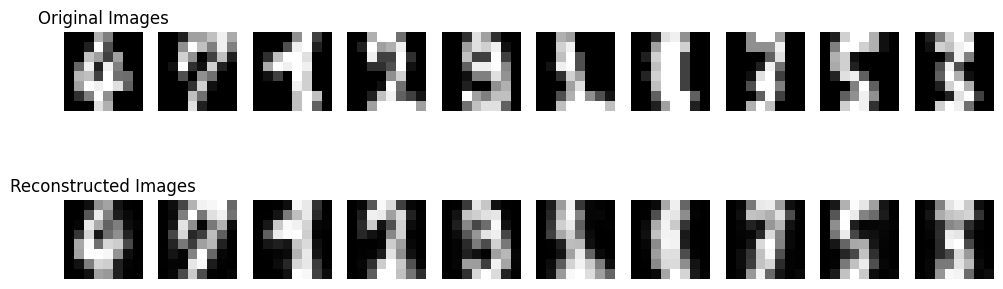

In [34]:
# Display the original input images in the first row and display the reconstructed images in the second row

fig, axes = plt.subplots(2, n, figsize=(12, 4))
for i in range(n):
    # Original Image
    axes[0, i].imshow(originals[i].reshape(8, 8), cmap='gray')
    axes[0, i].axis('off')

    # Reconstructed Image
    axes[1, i].imshow(reconstructions[i].reshape(8, 8), cmap='gray')
    axes[1, i].axis('off')

axes[0, 0].set_title("Original Images")
axes[1, 0].set_title("Reconstructed Images")

# 2. **Anomaly Detection using CAEs**

Anomaly Detection in Images
CAEs can detect anomalies by learning normal patterns and flagging unusual reconstructions.
Used in fraud detection (e.g., fake currency), defect detection (manufacturing), and medical anomaly detection.
Autoencoders can be used for anomaly detection by comparing reconstruction errors between normal and anomalous data. Since an autoencoder learns to reconstruct normal data well, anomalous data will have higher reconstruction errors.

## Steps to Compare Reconstruction Errors:

- Train an Autoencoder on Normal Data
- Compute Reconstruction Errors for normal and anomalous samples.
- Visualize Error Distribution to detect anomalies.

## **2.1 Create normal and anomalous data**

In [20]:
num_anomalies = 200
X_anomalies = X_scaled[:num_anomalies] + np.random.normal(0, 0.5, X_scaled[:num_anomalies].shape)
X_anomalies = np.clip(X_anomalies, 0, 1)  # Keep values in [0,1]

# Normal data (rest of the dataset)
X_normal = X_scaled[num_anomalies:]

### **Explanation**
This code artificially creates anomalies by adding **Gaussian noise (mean=0, std=0.5)** to the first 200 samples of X_scaled, ensuring values remain within [0,1] using np.clip(). The remaining data (X_normal) is treated as normal. This setup helps evaluate an autoencoder’s ability to distinguish normal data from anomalies.

## **2.2 Train the autoencoder**

In [21]:
input_dim = X_scaled.shape[1]
encoding_dim = 16  # Compressed size

# Encoder
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

# Decoder
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train only on normal data
autoencoder.fit(X_normal, X_normal, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1824 - val_loss: 0.1588
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1413 - val_loss: 0.1043
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0918 - val_loss: 0.0770
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0733 - val_loss: 0.0689
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0667 - val_loss: 0.0636
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0618 - val_loss: 0.0584
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0567 - val_loss: 0.0528
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0511 - val_loss: 0.0475
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0461 - val_loss: 0.0430
Epoch 10/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0414 - val_loss: 0.0397
Epoch 11/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0383 - val_loss: 0.0375
Epoch 12/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0364 - val_l

## **2.3 Calculate reconstruction errors**

In [22]:
# Get reconstructed data
X_normal_reconstructed = autoencoder.predict(X_normal)
X_anomalies_reconstructed = autoencoder.predict(X_anomalies)

# Compute reconstruction errors (MSE)
normal_errors = np.mean(np.square(X_normal - X_normal_reconstructed), axis=1)
anomaly_errors = np.mean(np.square(X_anomalies - X_anomalies_reconstructed), axis=1)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


### **Explanation**
The above code measures the autoencoder’s ability to reconstruct normal and anomalous data by computing reconstruction errors:

**Reconstruction:**

**X_normal_reconstructed = autoencoder.predict(X_normal):** Reconstructs normal data.
**X_anomalies_reconstructed = autoencoder.predict(X_anomalies):** Reconstructs artificially generated anomalies.

**Error Calculation (Mean Squared Error - MSE):**

**normal_errors = np.mean(np.square(X_normal - X_normal_reconstructed), axis=1):** Measures how well the autoencoder reconstructs normal data.
**anomaly_errors = np.mean(np.square(X_anomalies - X_anomalies_reconstructed), axis=1):** Measures reconstruction errors for anomalies.

Since autoencoders are trained on normal data, they usually reconstruct normal samples well (low error) but struggle with anomalies (high error), making reconstruction error a useful anomaly detection metric.

## **2.4 Visualize reconstruction errors**

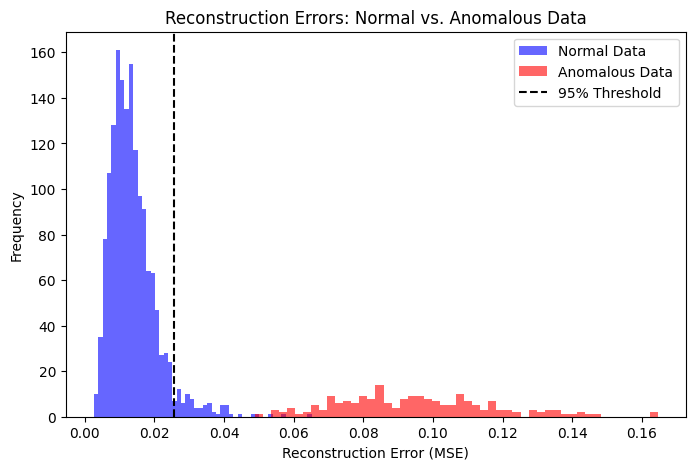

In [23]:
plt.figure(figsize=(8, 5))
plt.hist(normal_errors, bins=50, alpha=0.6, label="Normal Data", color='blue')
plt.hist(anomaly_errors, bins=50, alpha=0.6, label="Anomalous Data", color='red')
plt.axvline(np.percentile(normal_errors, 95), color='black', linestyle='dashed', label="95% Threshold")
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Reconstruction Errors: Normal vs. Anomalous Data")
plt.show()


## Interpreting the Results

- The blue histogram represents normal data reconstruction errors.

- The red histogram represents anomalous data reconstruction errors.
    
- The black dashed line is the 95th percentile of normal errors, which can be used as a threshold.

- Anomalous data has higher reconstruction errors, making it separable from normal data.

In [24]:
# Thank You
